## Importing Libraries and Setting Up Environment

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pickle

import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
np.random.seed(42)

In [26]:
processeded_df = pd.read_csv('../data/heart_disease_preprocessed.csv')
original_df = pd.read_csv('../data/heart_disease.csv')

In [27]:
original_df.drop(original_df[['id', 'dataset']], axis=1, inplace=True)
original_df['num'] = original_df['num'].apply(lambda x: 1 if x > 0 else 0)

## Data Visualization

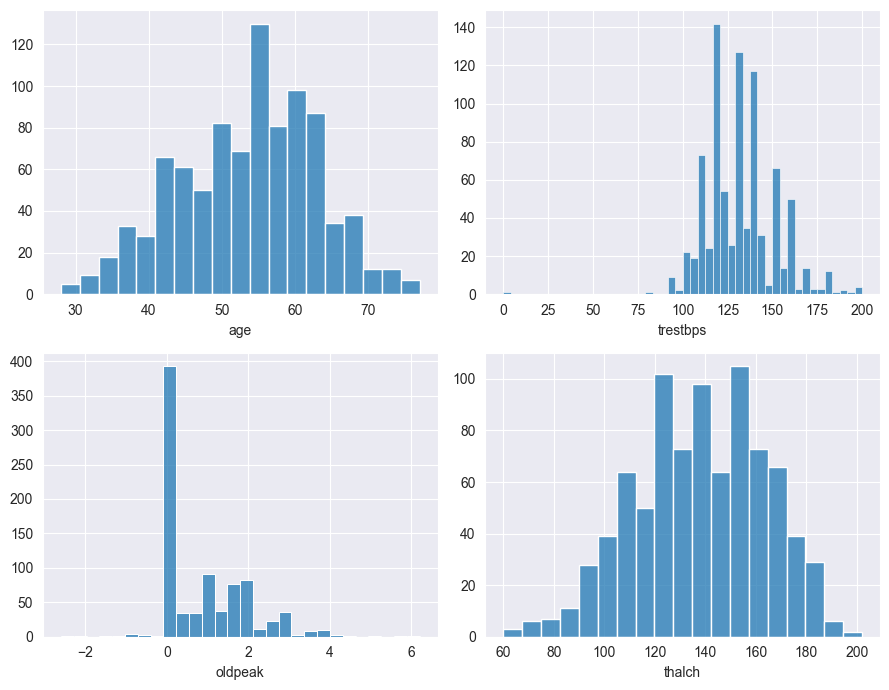

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(9, 7))

sns.histplot(x= original_df['age'], ax=ax[0,0])
sns.histplot(x= original_df['trestbps'], ax=ax[0,1])
sns.histplot(x= original_df['oldpeak'], ax=ax[1,0])
sns.histplot(x= original_df['thalch'], ax=ax[1,1])

for axes in ax.flat:
    axes.set_ylabel('')

plt.tight_layout()
plt.show()

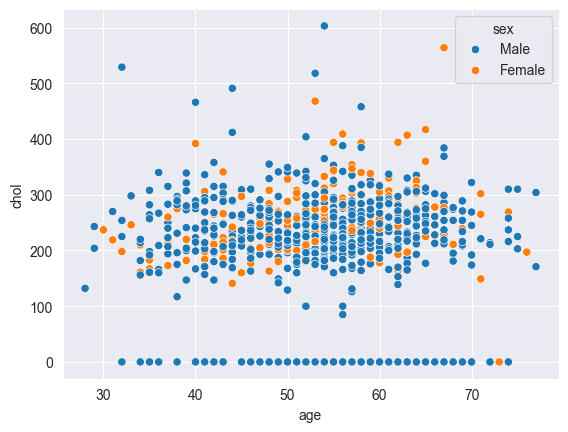

In [29]:
sns.scatterplot(original_df, x='age', y='chol', hue='sex')
plt.show()

<Figure size 2000x1600 with 0 Axes>

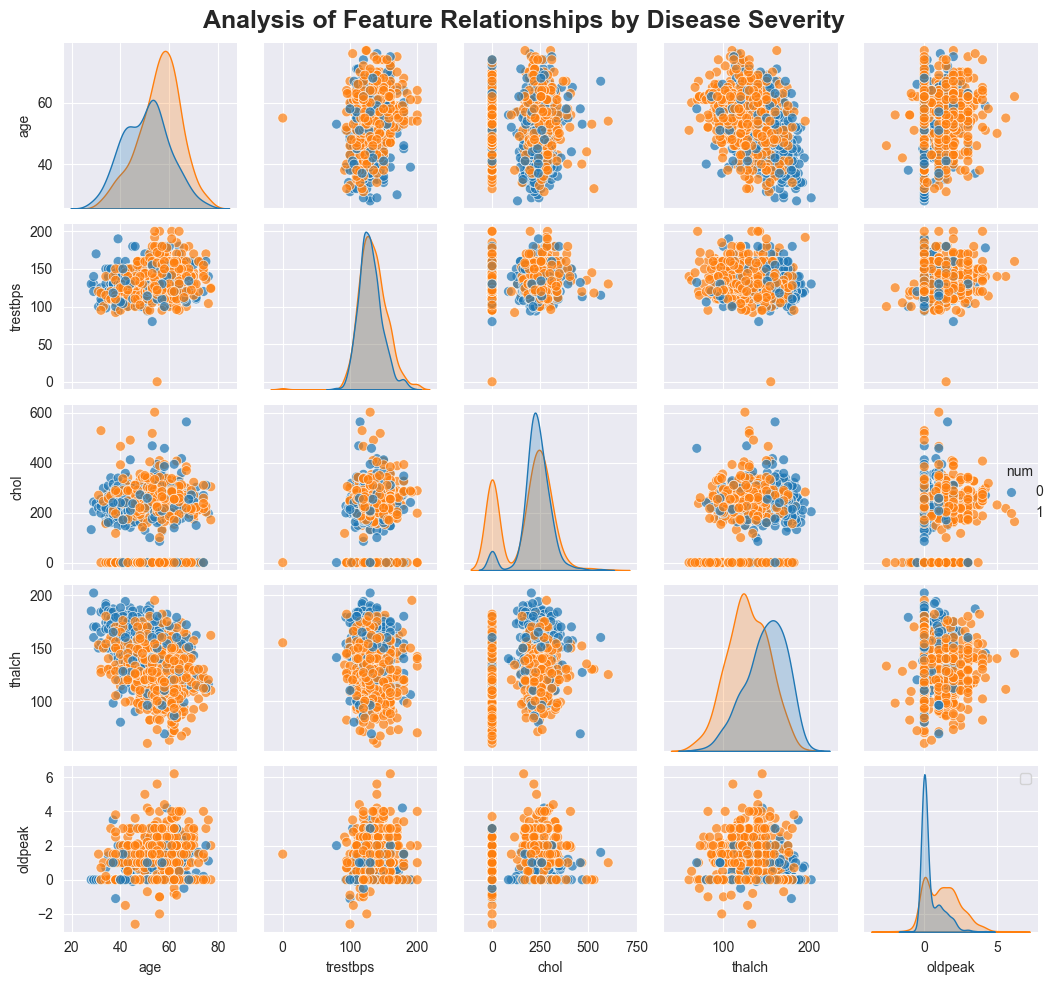

In [30]:
pairplot_data = original_df.drop(['fbs', 'exang', 'ca'], axis=1)
pairplot_data['num'] = pairplot_data['num'].astype('category')

plt.figure(figsize=(20,16))
sns.pairplot(pairplot_data, hue='num', diag_kind='kde', plot_kws={'alpha':0.7,'s':50}, height=2)
plt.suptitle('Analysis of Feature Relationships by Disease Severity', fontsize=18, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

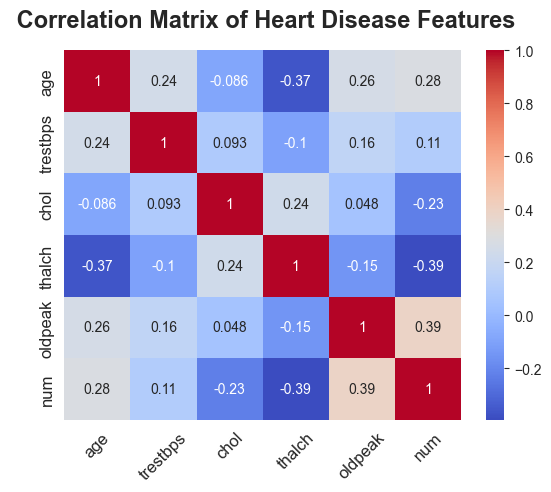

In [31]:
corr = original_df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title(' Correlation Matrix of Heart Disease Features', y=1.04, fontsize=17, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Split X & Y

In [32]:
X = processeded_df.drop('num', axis=1)
y = processeded_df['num']

### Dimension Reduction (PCA)

In [33]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
n_components = pca.n_components_

with open('../.pkl/pca.pkl', 'wb') as f:
    pickle.dump(pca, f)

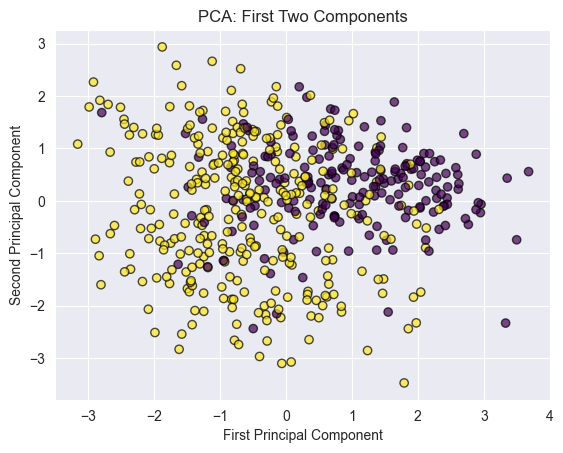

In [34]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=processeded_df['num'], cmap='viridis', alpha=0.7, edgecolor='k')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: First Two Components')
plt.show()

## Save preprocessed dataset

In [35]:
X_pca_df = pd.DataFrame(X_pca, columns=[f'PCA{i+1}' for i in range(n_components)])
full_df = pd.concat([X_pca_df, y.reset_index(drop=True)], axis=1)
full_df.to_csv('../data/heart_disease_preprocessed_pca.csv', index=False)